   # 3D графики в mpl_toolkits.mplot3d    

[PythonDataScienceHandbook](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html)

In [9]:
from mpl_toolkits import mplot3d  # обязательно

## Оси ax, в них можно рисовать 3D

### Способ 1: Оси через projection="3d"

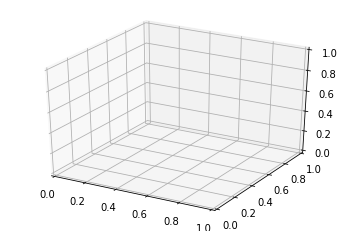

In [10]:
from mpl_toolkits import mplot3d

import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection="3d")

plt.show()

### Способ 2: Оси через Axes3D

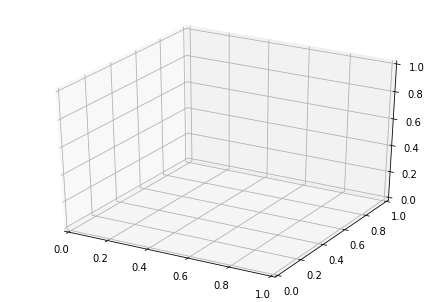

In [11]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d import axes3d   # новый import
ax = axes3d.Axes3D(plt.figure())          # создаем axes из figure

plt.show()

## Добавляем данные

* строим точки по x и точки по y как раньше (это векторы):
```
xi = np.arange(-1, 1, 0.01)   # точки по оси Х
yi = np.arange(-1, 1, 0.01)   # точки по оси Y
```
* из xi и yi делаем сетку узлов - много точек с координатами (x,y) - это матрица
```
X, Y = np.meshgrid(xi, yi)    # X, Y - узлы на сети 
```
* по каждой точке (x,y) вычисляем координату z в этой точке:
```
Z = X**2 - Y**2   # в каждой точке добавили z координату
```
* эти X, Y, Z передаем в функции рисования, например в `plot_surface`

Все это напишем в примере с осями, данными и графиком:

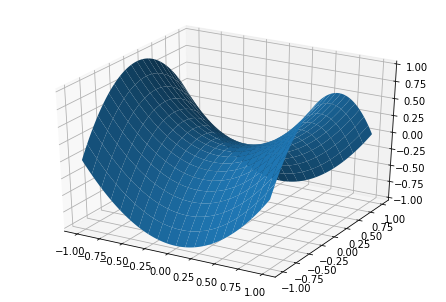

In [12]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d import axes3d   # новый import
ax = axes3d.Axes3D(plt.figure())          # создаем axes из figure

xi = np.arange(-1, 1, 0.01)               # точки по оси Х
yi = np.arange(-1, 1, 0.01)               # точки по оси Y
X, Y = np.meshgrid(xi, yi)                # X, Y - узлы на сети 
Z = X**2 - Y**2                           # в каждой точке добавили z координату

ax.plot_surface(X, Y, Z, rstride=10, cstride=10)   # заливка цветом

plt.show()

## Z - задаем отдельной функцией

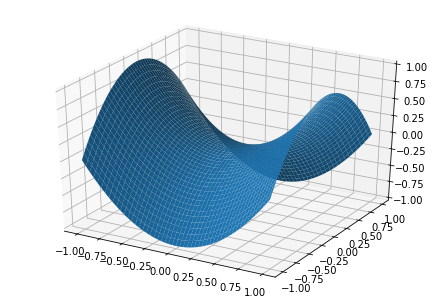

In [19]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

# отдельная функция, по x и y вычислить z
def z_function(x, y):
    return x ** 2 - y ** 2

fig = plt.figure()
ax = Axes3D(fig)

xi = np.arange(-1, 1, 0.01)               # точки по оси Х
yi = np.arange(-1, 1, 0.01)               # точки по оси Y
X, Y = np.meshgrid(xi, yi)                # X, Y - узлы на сети 
Z = z_function(X, Y)                      # в каждой точке добавили z координату


ax.plot_surface(X, Y, Z)

plt.show()

## Виды графиков

Типы графиков:
* Уже знаем plot, scatter, countor для 2D, новое - версии для 3D
    * **plot3D** - 1 линия - как обычный **plot**, но `plot3D(x, y, z)` - добавили z
    * **scatter3D** - как обычный **scatter**, но `scatter3D(x, y, z)` - добавили z
    * **contour3D** - изолинии

* новые типы графиков:
    * **plot_wireframe** - линиями 3D поверхность (пример ниже)
    * **plot_surface** - поверхность закрасить (пример выше)
    * **countor** - проекция
* bar:
    * **bar3d**

### Axes3D + plot_wireframe

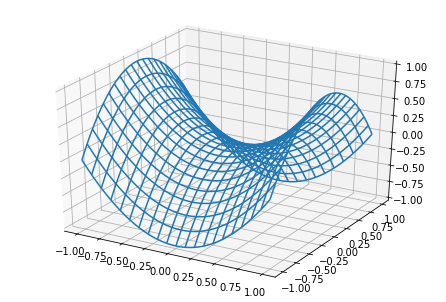

In [20]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d import axes3d   # новый import
ax = axes3d.Axes3D(plt.figure())          # создаем axes из figure

xi = np.arange(-1, 1, 0.01)               # точки по оси Х
yi = np.arange(-1, 1, 0.01)               # точки по оси Y
X, Y = np.meshgrid(xi, yi)                # X, Y - узлы на сети 
Z = X**2 - Y**2                           # в каждой точке добавили z координату

ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)  # рисуем линиями

plt.show()

### projection='3d' + plot_wireframe

Ось ax можно получить как обычно, через `add_subplots`, добавив в аргументы `projection='3d'`

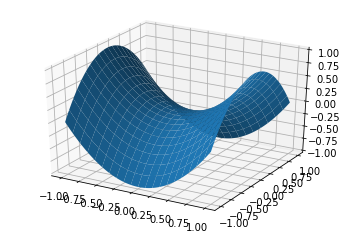

In [13]:
import matplotlib.pyplot as plt
import numpy as np

import mpl_toolkits.mplot3d

fig = plt.figure()
ax = plt.axes(projection="3d")   # ТУТ ДРУГОЕ!

xi = np.arange(-1, 1, 0.01)               # точки по оси Х
yi = np.arange(-1, 1, 0.01)               # точки по оси Y
X, Y = np.meshgrid(xi, yi)                # X, Y - узлы на сети 
Z = X**2 - Y**2                           # в каждой точке добавили z координату

ax.plot_surface(X, Y, Z, rstride=10, cstride=10)   # заливка цветом

plt.show()

## Colormap - другой цвет cmap='winter'

[Разные colormap](https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html) - они уже есть

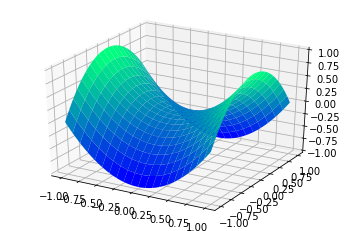

In [15]:
import matplotlib.pyplot as plt
import numpy as np

import mpl_toolkits.mplot3d

fig = plt.figure()
ax = plt.axes(projection="3d")

xi = np.arange(-1, 1, 0.01)
yi = np.arange(-1, 1, 0.01)
X, Y = np.meshgrid(xi, yi)
Z = X**2 - Y**2

# другими цветами: cmap = 'winter'
ax.plot_surface(X, Y, Z, rstride=10, cstride=10, cmap='winter')

plt.show()

## plot_surface, plot_wireframe, countor

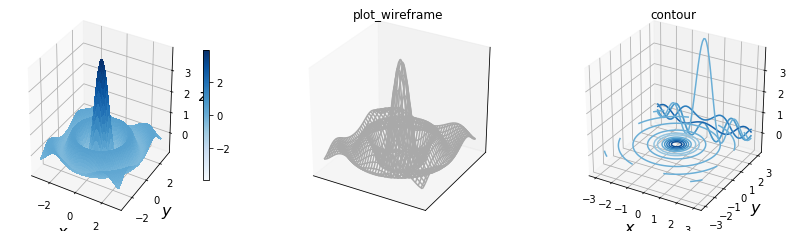

In [21]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

x = y = np.linspace(-3, 3, 74)
X, Y = np.meshgrid(x, y)

R = np.sqrt(X**2 + Y**2)
Z = np.sin(4 * R) / R

fig, ax = plt.subplots(1, 3, figsize=(14, 4), subplot_kw=dict(projection='3d'))

# subplot0 - surface

norm = mpl.colors.Normalize(-abs(Z).max(), abs(Z).max())

p = ax[0].plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0,
antialiased=False, norm=norm, cmap=mpl.cm.Blues)
cb = fig.colorbar(p, ax=ax[0], shrink=0.6)

ax[0].set_xlabel("$x$", fontsize=16)
ax[0].set_ylabel("$y$", fontsize=16)
ax[0].set_zlabel("$z$", fontsize=16)

# subplot1 - wireframe

ax[1].plot_wireframe(X, Y, Z, rstride=2, cstride=2, color="darkgrey")
ax[1].set_title("plot_wireframe")
# no ticks
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_zticks([])

# subplot2
ax[2].contour(X, Y, Z, zdir='z', offset=0, norm=norm, cmap=mpl.cm.Blues)
ax[2].contour(X, Y, Z, zdir='y', offset=3, norm=norm, cmap=mpl.cm.Blues)
ax[2].set_title("contour")
ax[2].set_xlabel("$x$", fontsize=16)
ax[2].set_ylabel("$y$", fontsize=16)
ax[2].set_zlabel("$z$", fontsize=16)

plt.show()
fig.savefig("5b0.png", dpi=100)  # results in 4*160x4*120 px image

## plot3D, scatter3D

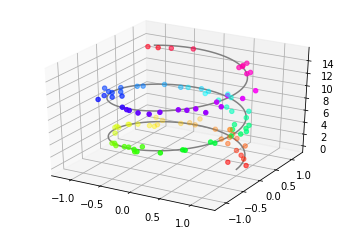

In [22]:
fig = plt.figure()
ax = plt.axes(projection="3d")

z_line = np.linspace(0, 15, 1000)
x_line = np.cos(z_line)
y_line = np.sin(z_line)
ax.plot3D(x_line, y_line, z_line, 'gray')

z_points = 15 * np.random.random(100)
x_points = np.cos(z_points) + 0.1 * np.random.randn(100)
y_points = np.sin(z_points) + 0.1 * np.random.randn(100)
ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv');

plt.show()

## 3D Bar Plots

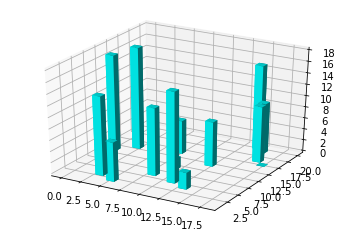

In [29]:
import random  # нужно, чтобы сделать случайные данные
fig = plt.figure()
ax = plt.axes(projection="3d")

num_bars = 15
x_pos = random.sample(range(20), num_bars)
y_pos = random.sample(range(20), num_bars)
z_pos = [0] * num_bars
x_size = np.ones(num_bars)
y_size = np.ones(num_bars)
z_size = random.sample(range(20), num_bars)

ax.bar3d(x_pos, y_pos, z_pos, x_size, y_size, z_size, color='aqua')
plt.show()

## Параметрический 3D график

Сфера задана уравнением
$$x = cos(u) \cdot cos(v)$$
$$y = sin(u) \cdot cos(v)$$
$$z = sin(v)$$
$u \in [-\pi, \pi]$, $v \in [-\pi/2, \pi/2]$

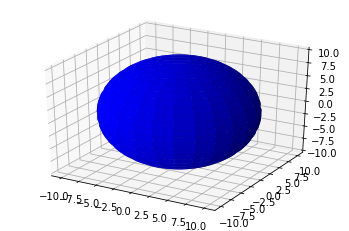

In [6]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

u = np.linspace(-np.pi, np.pi, 100)
u = np.linspace(-np.pi, np.pi, 100)

x = 10 * np.outer(np.cos(u), np.sin(v))
y = 10 * np.outer(np.sin(u), np.sin(v))
z = 10 * np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x, y, z, rstride=4, cstride=4, color='b')
plt.show()